download.jpg

### Google's Gemini AI now available worldwide for **developers**

In [1]:
!pip install -q google-generativeai==0.3.0
!pip install-q google-ai-generativelanguage==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 9.2 MB/s eta 0:00:00
ERROR: unknown command "install-q" - maybe you meant "install"


In [3]:
import google.generativeai as genai
from google.colab import userdata

In [8]:
from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = "your-api-free-yeah"

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [9]:
for m in genai.list_models():
  print(m.name)
  print(m.supported_generation_methods)

models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


In [10]:
model = genai.GenerativeModel('gemini-pro')

In [11]:
%%time
response = model.generate_content("Tell me about the India?")

CPU times: user 62.8 ms, sys: 8.18 ms, total: 71 ms
Wall time: 9.16 s


In [12]:
Markdown(response.text)

India, officially the Republic of India, is a country in South Asia. It is the seventh-largest country by geographical area, the second-most populous country with over 1.3 billion people, and the most populous democracy in the world. Bordered by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west, China, Nepal, and Bhutan to the northeast, and Burma and Bangladesh to the east. In the Indian Ocean, India is in the vicinity of Sri Lanka and the Maldives; in the Arabian Sea, it is near Oman and Iran.

India is a federal republic governed under a parliamentary system. It is a pluralistic, multilingual, and multi-religious society. The historic Indus Valley Civilization, one of the world's earliest civilizations, developed on the Indian subcontinent between 3300 BC and 1300 BC. India was identified with its historic names Bharat and Hindustan until 1947, when it gained independence from British rule.

India is a rapidly growing major economy. It is a member of the G20, BRICS, SCO, ASEAN Regional Forum, BIMSTEC, and the Commonwealth of Nations. India is a nuclear weapons state and has the world's third-largest standing army. It ranks 4th in the Global Firepower Index and is considered a potential superpower.

Here are some additional facts about India:

* India is the birthplace of four major world religions: Hinduism, Buddhism, Jainism, and Sikhism.
* The Ganges River is considered the holiest river in India and is worshipped as a goddess.
* The Taj Mahal is one of the most famous buildings in the world and is considered a symbol of love.
* India is home to the world's largest film industry, known as Bollywood.
* Cricket is the most popular sport in India.
* India is a major producer of spices, tea, and coffee.
* The Indian diaspora is one of the largest in the world, with over 30 million people living outside of India.

In [13]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [14]:
%%time
response = model.generate_content("Tell me about the IPL which is happening in India",stream=True)

CPU times: user 54.7 ms, sys: 7.51 ms, total: 62.2 ms
Wall time: 8.01 s


In [15]:
for chunk in response:
  print(chunk.text)
  print("-"*80)

The Indian Premier League (IPL) is a professional Twenty20 cricket league in
--------------------------------------------------------------------------------
 India contested by ten teams representing different cities in the country. The league was founded in 2008 by the Board of Control for Cricket in India (
--------------------------------------------------------------------------------
BCCI) and is currently sponsored by Tata.

The IPL is the most-attended cricket league in the world and is also one of the most-watched sporting events globally. The 2023 season of the IPL is the 16th season of the league and will be played from March 3
--------------------------------------------------------------------------------
1 to May 28 across various venues in India.

The teams in the IPL are:

* Chennai Super Kings
* Delhi Capitals
* Gujarat Titans
* Kolkata Knight Riders
* Lucknow Super Giants
* Mumbai Indians
* Punjab Kings
* Rajasthan Royals
* Royal Challengers Bangalore
* Sunrisers Hyde

In [16]:
# own model

generation_config = {
    "temperature": 0.9,
    "top_p": 1,
    "top_k": 1,
    "max_output_tokens" : 2048,
}

safety_settings = [
    {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
    },
    {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
    },
    {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
    },
    {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
    }
]

In [17]:
model = genai.GenerativeModel(
    model_name="gemini-pro",
    generation_config=generation_config,
    safety_settings=safety_settings
)

In [18]:
prompt_parts = [
    "Who is the current best cricket player in the world?"
]

response = model.generate_content(prompt_parts)

In [20]:
print(response.text)

As of my knowledge cutoff date (September 2021), the top-ranked player in men's cricket, according to the ICC Men's Test Player Rankings, is Kane Williamson from New Zealand. Williamson is recognized for his exceptional batting skills and consistent performances across all formats of the game.

However, it is important to note that player rankings can change over time based on their performances in ongoing matches. To obtain the most up-to-date information on the current best cricket player in the world, you can refer to the latest ICC player rankings or follow reputable cricket news sources for their expert opinions and analyses.


In [21]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

# Chat Model


In [22]:
genearation_config ={
    "temperature": 0.9,
    "top_p" : 1,
    "top_k" : 1,
    "max_output_tokens":2048,
}

In [23]:
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]

In [24]:
model = genai.GenerativeModel(model_name="gemini-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [25]:
chat = model.start_chat(history=[])

chat.send_message("Tell me about top ten cricketers in world for current generation players")

In [26]:
Markdown(chat.last.text)

1. Virat Kohli (India): Widely regarded as one of the greatest batsmen of all time, Kohli is known for his aggressive style of play and remarkable consistency.


2. Babar Azam (Pakistan): A talented batsman with exceptional technique and shot-making abilities, Azam is currently ranked as the number one batsman in the ICC T20I rankings.


3. Steve Smith (Australia): A former captain of the Australian cricket team, Smith is known for his unorthodox batting style and his ability to score runs in all formats of the game.


4. Kane Williamson (New Zealand): A stylish batsman known for his calm and composed approach, Williamson is the current captain of the New Zealand cricket team.


5. Quinton de Kock (South Africa): A dynamic wicket-keeper batsman, de Kock is known for his explosive batting and his ability to change the course of a match quickly.


6. Rohit Sharma (India): A prolific batsman known for his powerful hitting and ability to score big runs, Sharma is currently the vice-captain of the Indian cricket team.


7. David Warner (Australia): A destructive batsman known for his aggressive style of play, Warner has been a key member of the Australian cricket team for many years.


8. Mohammad Amir (Pakistan): A left-arm fast bowler known for his ability to swing the ball both ways, Amir has been a key member of the Pakistani cricket team for many years.


9. Jasprit Bumrah (India): A right-arm fast bowler known for his ability to bowl yorkers and variations, Bumrah is currently one of the best bowlers in the world.


10. Jofra Archer (England): A right-arm fast bowler known for his raw pace and accuracy, Archer is a key member of the English cricket team and is considered one of the most exciting young players in the world.

In [27]:
chat.send_message("Tell me about top 3 IPL stars in india")

Markdown(chat.last.text)

1. **Virat Kohli:** The former captain of the Indian cricket team and Royal Challengers Bangalore, Virat Kohli is undoubtedly one of the biggest stars in the IPL. He is known for his aggressive batting style and his ability to score runs consistently. Kohli has won the IPL title three times with RCB and has been the leading run-scorer in the tournament on multiple occasions.


2. **MS Dhoni:** The former captain of the Indian cricket team and Chennai Super Kings, MS Dhoni is another iconic figure in the IPL. He is known for his calm and composed demeanor, his strategic captaincy, and his ability to finish games off with the bat. Dhoni has won the IPL title four times with CSK and is widely regarded as one of the greatest finishers in the history of the game.


3. **Rohit Sharma:** The current captain of the Indian cricket team and Mumbai Indians, Rohit Sharma is a prolific batsman known for his powerful hitting and his ability to score big runs. He is the all-time leading run-scorer in the IPL and has won the tournament a record five times with MI. Rohit is also known for his innovative captaincy and his ability to get the best out of his players.

These three players are not only among the most successful in the IPL, but they are also some of the most popular and recognizable cricketers in the world. They have a huge fan following in India and their presence in the IPL attracts a lot of attention and excitement.

In [28]:
for message in chat.history:
  display(Markdown(f'**{message.role}**: {message.parts[0].text}'))

**user**: Tell me about top ten cricketers in world for current generation players

**model**: 1. Virat Kohli (India): Widely regarded as one of the greatest batsmen of all time, Kohli is known for his aggressive style of play and remarkable consistency.


2. Babar Azam (Pakistan): A talented batsman with exceptional technique and shot-making abilities, Azam is currently ranked as the number one batsman in the ICC T20I rankings.


3. Steve Smith (Australia): A former captain of the Australian cricket team, Smith is known for his unorthodox batting style and his ability to score runs in all formats of the game.


4. Kane Williamson (New Zealand): A stylish batsman known for his calm and composed approach, Williamson is the current captain of the New Zealand cricket team.


5. Quinton de Kock (South Africa): A dynamic wicket-keeper batsman, de Kock is known for his explosive batting and his ability to change the course of a match quickly.


6. Rohit Sharma (India): A prolific batsman known for his powerful hitting and ability to score big runs, Sharma is currently the vice-captain of the Indian cricket team.


7. David Warner (Australia): A destructive batsman known for his aggressive style of play, Warner has been a key member of the Australian cricket team for many years.


8. Mohammad Amir (Pakistan): A left-arm fast bowler known for his ability to swing the ball both ways, Amir has been a key member of the Pakistani cricket team for many years.


9. Jasprit Bumrah (India): A right-arm fast bowler known for his ability to bowl yorkers and variations, Bumrah is currently one of the best bowlers in the world.


10. Jofra Archer (England): A right-arm fast bowler known for his raw pace and accuracy, Archer is a key member of the English cricket team and is considered one of the most exciting young players in the world.

**user**: Tell me about top 3 IPL stars in india

**model**: 1. **Virat Kohli:** The former captain of the Indian cricket team and Royal Challengers Bangalore, Virat Kohli is undoubtedly one of the biggest stars in the IPL. He is known for his aggressive batting style and his ability to score runs consistently. Kohli has won the IPL title three times with RCB and has been the leading run-scorer in the tournament on multiple occasions.


2. **MS Dhoni:** The former captain of the Indian cricket team and Chennai Super Kings, MS Dhoni is another iconic figure in the IPL. He is known for his calm and composed demeanor, his strategic captaincy, and his ability to finish games off with the bat. Dhoni has won the IPL title four times with CSK and is widely regarded as one of the greatest finishers in the history of the game.


3. **Rohit Sharma:** The current captain of the Indian cricket team and Mumbai Indians, Rohit Sharma is a prolific batsman known for his powerful hitting and his ability to score big runs. He is the all-time leading run-scorer in the IPL and has won the tournament a record five times with MI. Rohit is also known for his innovative captaincy and his ability to get the best out of his players.

These three players are not only among the most successful in the IPL, but they are also some of the most popular and recognizable cricketers in the world. They have a huge fan following in India and their presence in the IPL attracts a lot of attention and excitement.

In [29]:
chat.history

[parts {
   text: "Tell me about top ten cricketers in world for current generation players"
 }
 role: "user",
 parts {
   text: "1. Virat Kohli (India): Widely regarded as one of the greatest batsmen of all time, Kohli is known for his aggressive style of play and remarkable consistency.\n\n\n2. Babar Azam (Pakistan): A talented batsman with exceptional technique and shot-making abilities, Azam is currently ranked as the number one batsman in the ICC T20I rankings.\n\n\n3. Steve Smith (Australia): A former captain of the Australian cricket team, Smith is known for his unorthodox batting style and his ability to score runs in all formats of the game.\n\n\n4. Kane Williamson (New Zealand): A stylish batsman known for his calm and composed approach, Williamson is the current captain of the New Zealand cricket team.\n\n\n5. Quinton de Kock (South Africa): A dynamic wicket-keeper batsman, de Kock is known for his explosive batting and his ability to change the course of a match quickly.\n\

# Gemini Pro Vision

In [30]:
!curl -o Virat_kohli.jpg https://www.livemint.com/lm-img/img/2023/12/12/600x338/CRICKET-WORLDCUP-IND-AUS--600_1702375600556_1702375688912.JPG

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24057  100 24057    0     0   118k      0 --:--:-- --:--:-- --:--:--  118k


In [31]:
import PIL.Image

img = PIL.Image.open('Virat_kohli.jpg')

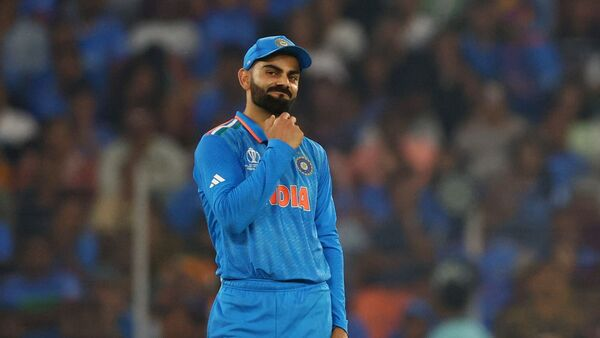

In [32]:
img

In [33]:
new_size = (200, 200)
img = img.resize(new_size)

In [35]:
model = genai.GenerativeModel('gemini-pro-vision')

In [36]:
response = model.generate_content(img)

In [37]:
Markdown(response.text)

 Virat Kohli is an Indian cricketer who currently captains the India national team. He is often regarded as one of the greatest batsmen of all time. Kohli has been praised for his aggressive batting style and his ability to score runs quickly. He is also known for his strong leadership skills and his commitment to the Indian team. Under Kohli's captaincy, India has won several major tournaments, including the 2013 ICC Champions Trophy and the 2016 ICC World Twenty20. Kohli is also a popular figure off the field, and he has been involved in several charitable activities. He is married to actress Anushka Sharma, and they have a daughter together.

In [40]:
response = model.generate_content(["Give me top 10 incident happaend to him like main facts and dates:", img], stream=True)
response.resolve()

In [41]:
Markdown(response.text)

 1. **Virat Kohli's Test debut**

Virat Kohli made his Test debut for India against the West Indies in 2011. He scored a century in each of his first two Tests, becoming the first Indian batsman to do so.

2. **Virat Kohli's ODI debut**

Virat Kohli made his ODI debut for India against Sri Lanka in 2008. He scored a half-century in his first match and went on to become one of the most successful ODI batsmen of all time.

3. **Virat Kohli's T20I debut**

Virat Kohli made his T20I debut for India against Pakistan in 2010. He scored a half-century in his first match and went on to become one of the most successful T20I batsmen of all time.

4. **Virat Kohli's first World Cup**

Virat Kohli played in his first World Cup in 2011. He scored a century in the final against Sri Lanka and helped India win the tournament.

5. **Virat Kohli's first IPL century**

Virat Kohli scored his first IPL century in 2016. He scored 100 runs off 63 balls against the Gujarat Lions.

6. **Virat Kohli's first Champions Trophy**

Virat Kohli played in his first Champions Trophy in 2013. He scored a century in the final against England and helped India win the tournament.

7. **Virat Kohli's first Asia Cup**

Virat Kohli played in his first Asia Cup in 2012. He scored a century in the final against Pakistan and helped India win the tournament.

8. **Virat Kohli's first Test series win as captain**

Virat Kohli led India to their first Test series win in Australia in 2018-19. He scored two centuries in the series and was named the Player of the Series.

9. **Virat Kohli's first ODI series win as captain**

Virat Kohli led India to their first ODI series win in South Africa in 2018. He scored two centuries in the series and was named the Player of the Series.

10. **Virat Kohli's first T20I series win as captain**

Virat Kohli led India to their first T20I series win in England in 2018. He scored two half-centuries in the series and was named the Player of the Series.

In [42]:
print("Above Answers are not accurate. What?")

Above Answers are not accurate. What?


In [43]:
!curl -o Rohit_sharma.jpg https://www.hindustantimes.com/ht-img/img/2023/12/13/550x309/FILES-CRICKET-IND-ROHIT-KOHLI-1_1702477147608_1702477194650.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37416    0 37416    0     0  96675      0 --:--:-- --:--:-- --:--:-- 96682


In [44]:
!curl -o vijay.jpg https://akm-img-a-in.tosshub.com/indiatoday/images/story/202208/vijay-deverakonda_164196900796_1200x768.jpeg?VersionId=DTMZ3htiD.4HFOSxnwmVIkysxJ.YQ4or&size=690:388

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 76580  100 76580    0     0  37072      0  0:00:02  0:00:02 --:--:-- 37084


In [45]:
img1 = PIL.Image.open("Rohit_sharma.jpg")
img2 = PIL.Image.open('vijay.jpg')

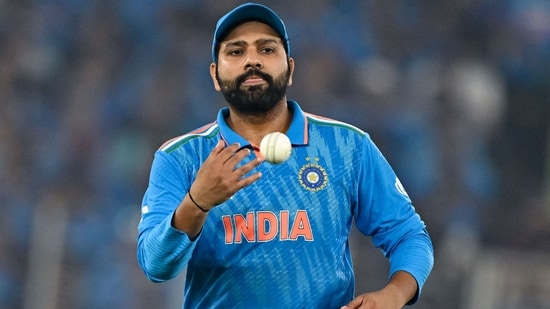

In [46]:
img1

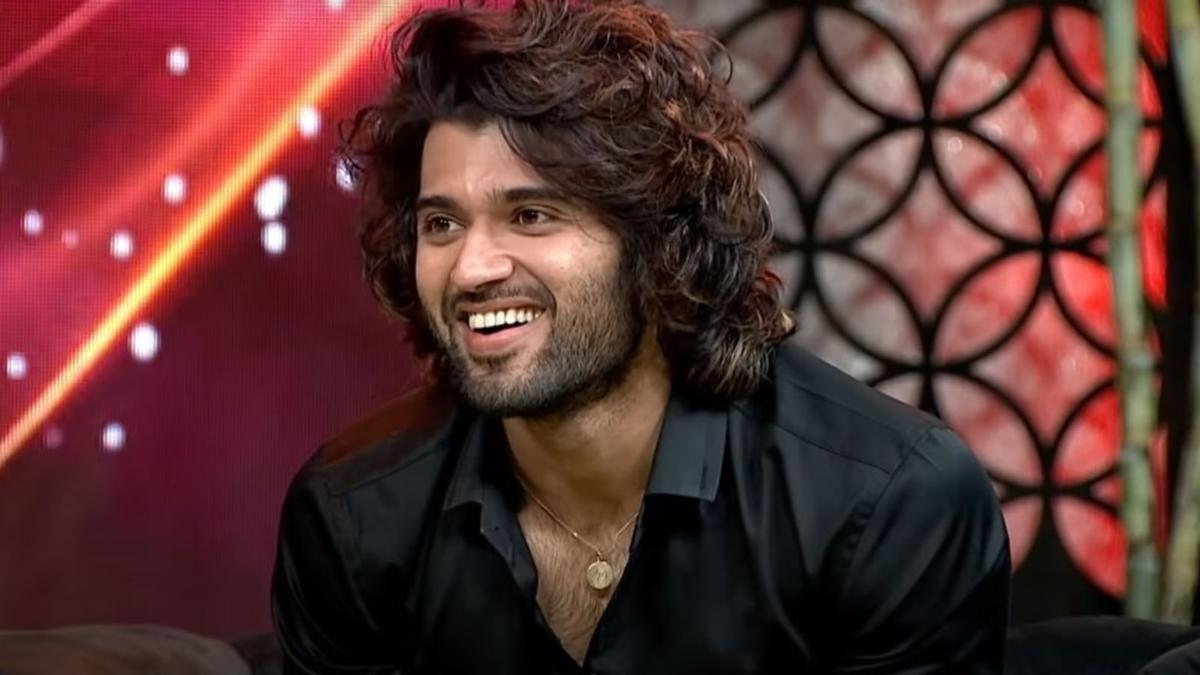

In [47]:
img2

In [48]:
new_size = (200, 200)

In [49]:
resized_img1 = img1.resize(new_size)
resized_img2 = img2.resize(new_size)

In [50]:
response = model.generate_content([ "Give me some of the differences between these 2 planets:",resized_img2,resized_img1 ], stream=True)
response.resolve()

In [51]:
Markdown(response.text)

 The first image is of the Indian actor Vijay Deverakonda. The second image is of the Indian cricketer Rohit Sharma.

In [52]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [53]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Gemini.ipynb')

--2023-12-14 06:29:13--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2023-12-14 06:29:13 (30.3 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configu

'File Download Unsuccessful. Saved in Google Drive'